In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../../pycore/')
from simulate import RBA_result
from utils import extract_details_from_rxnid

import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import matplotlib.lines as mlines
%matplotlib inline

#### Simulation

In [2]:
# Mu = 0
res = RBA_result(biom_id=None)
res.load_from_json('../output/batch/results/mu_0/RBA_result.json')
glc0 = -res.metabolic_flux['EX_glc__D_e']

In [3]:
reslist = []

# Batch
flist = ['vglc_0_5', 'vglc_1_0', 'vglc_2_0', 'vglc_3_0', 'vglc_4_0', 'vglc_5_0',
         'vglc_5_5', 'vglc_5_6', 'vglc_5_7', 'vglc_5_8', 'vglc_5_9', 'vglc_6_0', 'vglc_7_0',
         'vglc_8_0', 'vglc_9_0', 'vglc_10_0', 'vglc_11_0', 'vglc_12_0',
         'vglc_13_0', 'vglc_14_0', 'vglc_15_0', 'vglc_16_0', 'vglc_17_0', 'vglc_20_0', 'vglc_21_0']
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/batch/results_capacitycorrected/' + fdir + '/RBA_result.json')
    reslist.append(res)
    
flist = ['vglc_23_0', 'vglc_30_0', 'vglc_35_0']
for fdir in flist:
    res = RBA_result(biom_id=None)
    res.load_from_json('../output/batch/results/' + fdir + '/RBA_result.json')
    reslist.append(res)
    
glcs = [glc0] + [-res.metabolic_flux['EX_glc__D_e'] for res in reslist]
mito_fracs = [0]
for res in reslist:
    prot_modeled = res.raw_flux['BIOSYN-PROTMODELED']
    prot_modeled_mito = res.raw_flux['BIOSYN-PROTMITO']
    mito_fracs.append(prot_modeled_mito / prot_modeled)

In [4]:
max(mito_fracs)

0.07908703781902778

#### Plot

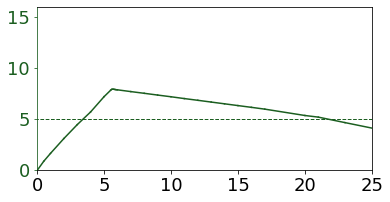

In [5]:
fig,ax = plt.subplots(figsize=(6,3))

# Plot model-predicted protein capacity usage
N = len(glcs)
for i in range(0,N-1):
    p1 = [glcs[i], glcs[i+1]]; p2 = [mito_fracs[i], mito_fracs[i+1]]
    line = mlines.Line2D(p1, p2, color='#1b5e20', linestyle='-')
    ax.add_line(line);

ax.set_xlim(0,25)
xticks = [0,5,10,15,20,25]
ax.set_xticks(xticks);
ax.set_xticklabels(xticks, fontsize=18);

ax.set_ylim(0, 0.16);
yticks = [0, 0.05, 0.1, 0.15]
yticklabels = [0, 5, 10, 15]
ax.set_yticks(yticks);
ax.set_yticklabels(yticklabels, fontsize=18);

ax.spines['left'].set_color('#1b5e20')
ax.tick_params(axis='y', colors='#1b5e20')

# Estimating line
line = mlines.Line2D([-1, 30], [0.05, 0.05], color='#1b5e20', linestyle='--', zorder=0, lw=1)
ax.add_line(line);

#ax.set_xlabel('Glucose uptake rate (mmol gDW$^{-1}$ h$^{-1}$)', fontsize=16);
#ax.set_ylabel('Fraction of modeled proteome\nlocating at mitochondria (%)', fontsize=16);

#plt.savefig('../../../scRBA_figures/components/crabtree/mito_frac_mitono_riboyes.png', transparent=True, bbox_inches='tight')